Epoch 0 - Loss: 25093.44
Epoch 1000 - Loss: 4707.95
Epoch 2000 - Loss: 4085.12
Epoch 3000 - Loss: 3795.88
Epoch 4000 - Loss: 3657.00
Epoch 5000 - Loss: 3587.03
Epoch 6000 - Loss: 3549.47
Epoch 7000 - Loss: 3527.77
Epoch 8000 - Loss: 3514.26
Epoch 9000 - Loss: 3505.28

Final MSE on Test Data: 3606.48


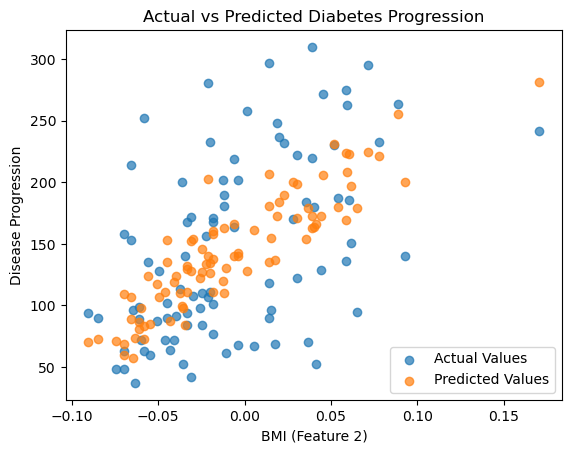


과제 목표 달성 여부: 실패


In [12]:
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
 
# (1) 데이터 가져오기
diabetes = load_diabetes()
df_X = diabetes.data
df_y = diabetes.target
 
# (2) 모델에 입력할 데이터 X 준비하기
X = np.array(df_X)
 
# (3) 모델에 예측할 데이터 y 준비하기
y = np.array(df_y)
 
# (4) train 데이터와 test 데이터로 분리하기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
 
# (5) 모델 준비하기
def model(X, W, b):
    predictions = 0
    for i in range(len(W)):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions
 
# (6) 손실함수 loss 정의하기 (MSE)
def loss(X, W, b, y):
    predictions = model(X, W, b)
    mse = np.mean((predictions - y) ** 2)
    return mse
 
# (7) 기울기를 구하는 gradient 함수 구현하기
def gradient(X, W, b, y):
    N = len(y)
    predictions = model(X, W, b)
    dW = np.zeros_like(W)
    db = 0
    
    for i in range(len(W)):
        dW[i] = np.mean(2 * (predictions - y) * X[:, i])
    db = np.mean(2 * (predictions - y))
    
    return dW, db
 
# (8) 하이퍼 파라미터 설정 - 학습률만 0.5로 변경
selected_features = [2, 3, 9]  # bmi, bp, glu
X_train_selected = X_train[:, selected_features]
X_test_selected = X_test[:, selected_features]
 
LEARNING_RATE = 0.05  # 학습률을 0.5로 설정
EPOCHS = 10000
 
# 가중치와 편향 초기화
W = np.random.randn(len(selected_features))
b = np.random.randn(1)
 
# (9) 모델 학습하기
for epoch in range(EPOCHS):
    dW, db = gradient(X_train_selected, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    
    if epoch % 1000 == 0:
        current_loss = loss(X_train_selected, W, b, y_train)
        print(f"Epoch {epoch} - Loss: {current_loss:.2f}")
 
# (10) test 데이터에 대한 성능 확인하기
prediction = model(X_test_selected, W, b)
mse = loss(X_test_selected, W, b, y_test)
print(f"\nFinal MSE on Test Data: {mse:.2f}")
 
# (11) 정답 데이터와 예측한 데이터 시각화하기
plt.scatter(X_test_selected[:, 0], y_test, label='Actual Values', alpha=0.7)
plt.scatter(X_test_selected[:, 0], prediction, label='Predicted Values', alpha=0.7)
plt.title('Actual vs Predicted Diabetes Progression')
plt.xlabel('BMI (Feature 2)')
plt.ylabel('Disease Progression')
plt.legend()
plt.show()
 
print(f"\n과제 목표 달성 여부: {'성공' if mse <= 3000 else '실패'}")